In [3]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [4]:
env = Maze()

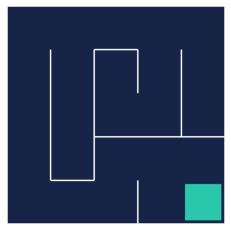

In [5]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [6]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [7]:
policy_probs = np.full((5, 5, 4), 0.25)

In [8]:
def policy(state):
    return policy_probs[state]

In [9]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


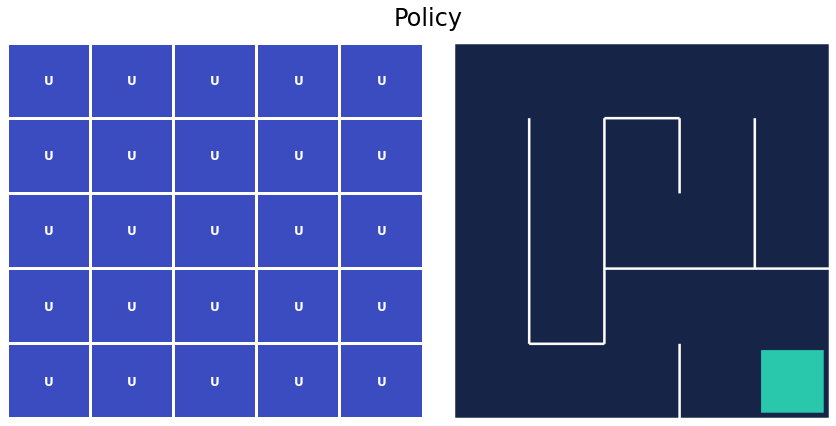

In [11]:
plot_policy(policy_probs, frame)

In [12]:
state_values = np.zeros(shape=(5,5))

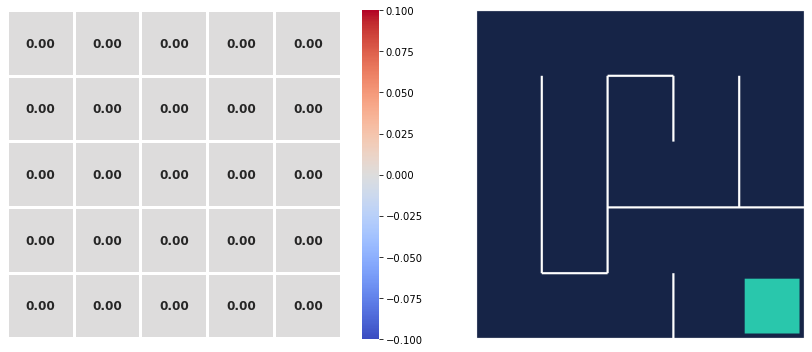

In [13]:
plot_values(state_values, frame)

In [39]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row,col)]
                new_value = 0.
                action_probabilities = policy_probs[(row,col)]
                
                
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row,col),action)
                    new_value += prob *(reward + gamma * state_values[next_state])
            
                state_values[(row,col)] = new_value
                delta = max(delta, abs(old_value - new_value))

In [60]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    policy_stable = True
    
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row,col)].argmax()

            new_action = None

            max_qsa = float("-inf")


            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row,col),action)
                qsa = reward + gamma * state_values[next_state]

                if qsa > max_qsa:
                    new_action = action
                    max_qsa = qsa

            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row,col)] = action_probs

            if new_action != old_action:
                policy_stable = False

    return policy_stable

In [69]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    
    while not policy_stable:
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)
        
        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_probs, frame)

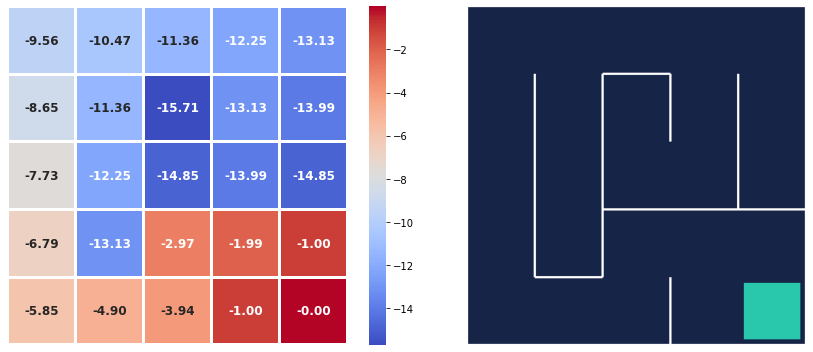

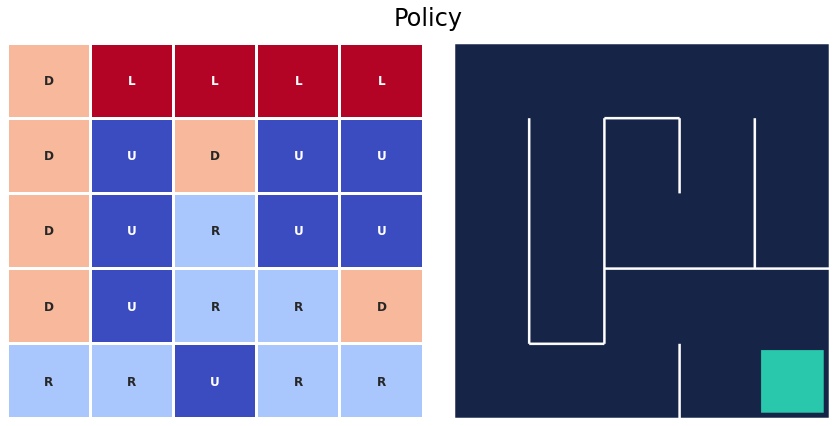

In [70]:
policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99)

## Show results

#### Test the resulting agent

In [ ]:
test_agent(env, policy_probs)